In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

使用t-SNE进行降维：

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

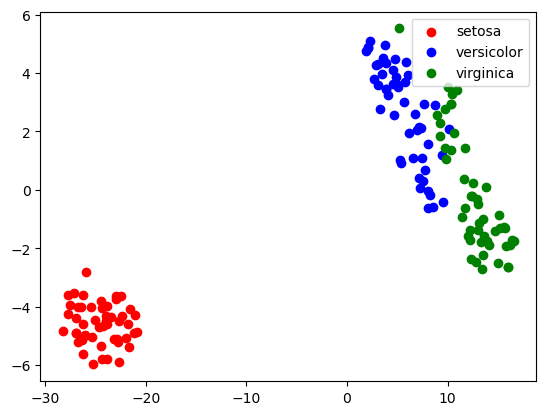

In [14]:
plt.scatter(X_tsne[y == 0][:, 0], X_tsne[y == 0][:, 1], color='red', label=iris.target_names[0])
plt.scatter(X_tsne[y == 1][:, 0], X_tsne[y == 1][:, 1], color='blue', label=iris.target_names[1])
plt.scatter(X_tsne[y == 2][:, 0], X_tsne[y == 2][:, 1], color='green', label=iris.target_names[2])
plt.legend()
plt.show()

使用k折交叉验证评估SVM：

In [15]:
clf = SVC()
scores = cross_val_score(clf, X_tsne, y, cv=5)
print(f"Mean Accuracy: {np.mean(scores) * 100:.2f}%")
print(f"Standard Deviation: {np.std(scores) * 100:.2f}%")

Mean Accuracy: 96.67%
Standard Deviation: 2.98%


训练SVM并可视化决策边界：

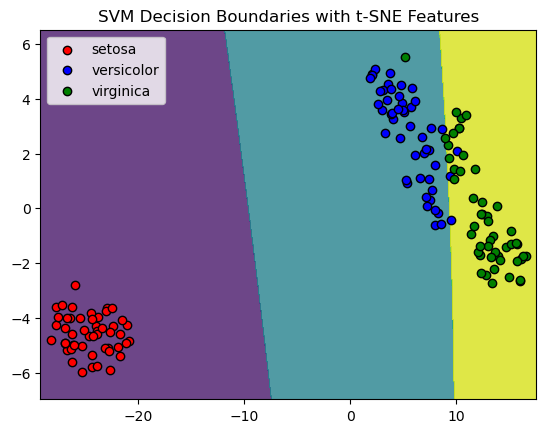

In [18]:
clf.fit(X_tsne, y)

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_tsne[y == 0][:, 0], X_tsne[y == 0][:, 1], color='red', edgecolor='k', label=iris.target_names[0])
plt.scatter(X_tsne[y == 1][:, 0], X_tsne[y == 1][:, 1], color='blue', edgecolor='k', label=iris.target_names[1])
plt.scatter(X_tsne[y == 2][:, 0], X_tsne[y == 2][:, 1], color='green', edgecolor='k', label=iris.target_names[2])
plt.legend()
plt.title("SVM Decision Boundaries with t-SNE Features")
plt.show()